In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
import control
import collections
import pandas as pd 

In [2]:
front_data = pd.read_csv('Rear_Motor_Final.csv', index_col=0, usecols=range(21))
front_data

,ESC signal (µs),Servo 1 (µs),Servo 2 (µs),Servo 3 (µs),AccX (g),AccY (g),AccZ (g),Torque (N·m),Thrust (kgf),Voltage (V),Current (A),Motor Electrical Speed (RPM),Motor Optical Speed (RPM),Electrical Power (W),Mechanical Power (W),Motor Efficiency (%),Propeller Mech. Efficiency (kgf/W),Overall Efficiency (kgf/W),Vibration (g),App message
Time (s),,,,,,,,,,,,,,,,,,,,
0.000000,1000,NaN,NaN,NaN,-1.0625,0.000000,0.042969,NaN,NaN,12.227713,-0.005257,0,0,0.064285,NaN,0.0,NaN,NaN,0.082031,NaN
0.000000,1000,NaN,NaN,NaN,-1.0625,0.027344,0.007812,NaN,0.000294,12.227912,-0.004669,0,0,0.057093,NaN,0.0,NaN,NaN,0.082031,NaN
0.022555,1000,NaN,NaN,NaN,-1.0625,-0.011719,-0.003906,NaN,NaN,12.227754,-0.002706,0,0,0.033094,NaN,0.0,NaN,NaN,0.082031,NaN
0.047755,1000,NaN,NaN,NaN,-1.0625,0.007812,0.021484,NaN,NaN,12.227789,-0.003262,0,0,0.039890,NaN,0.0,NaN,NaN,0.082031,NaN
0.072535,1000,NaN,NaN,NaN,-1.0625,0.007812,0.021484,-0.00014,NaN,12.227820,-0.001756,0,0,0.021468,0.0,0.0,0.0,0.0,0.082031,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152.556635,1000,NaN,NaN,NaN,-1.0625,-0.001953,0.019531,NaN,NaN,12.022629,-0.000434,0,0,0.000000,NaN,0.0,NaN,NaN,0.087891,NaN
152.582630,1000,NaN,NaN,NaN,-1.0625,0.011719,-0.001953,NaN,NaN,12.022777,-0.001756,0,0,0.021107,NaN,0.0,NaN,NaN,0.087891,NaN
152.609160,1000,NaN,NaN,NaN,-1.0625,0.005859,0.007812,NaN,0.000368,12.023013,-0.002532,0,0,0.030444,NaN,0.0,NaN,NaN,0.087891,NaN


In [3]:
# creating variables from colom elements
thrust = front_data['Thrust (kgf)']
rpm = front_data['Motor Electrical Speed (RPM)']
pwm = front_data['ESC signal (µs)']
torque = front_data['Torque (N·m)']

In [4]:
#Values
rho = 1.225 #kg/m^3
r = 0.06985/2 #prop diam in m 
s = np.pi*r*r

In [5]:
#math to solve ct
q = 0.5*rho*(rpm*(2*np.pi/60)*r)**2
ct = thrust*(9.81)/(q*s)

In [6]:
#math to nodimensionalize pwm aka voltage relation
pwm_v = (pwm/1000)-1

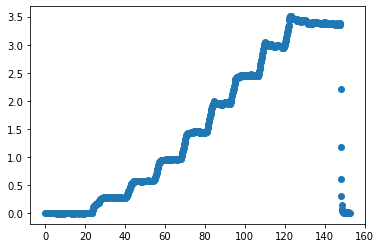

In [7]:
plt.plot(thrust*9.81,'o')

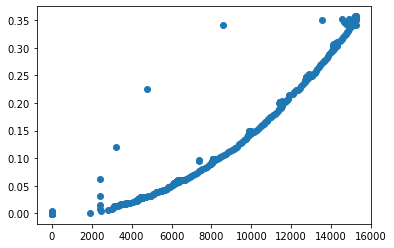

In [8]:
plt.plot(rpm,thrust,'o')

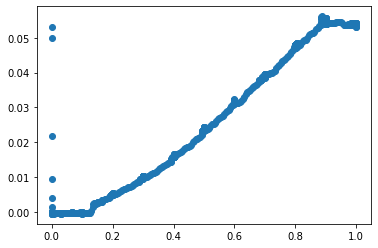

In [28]:
plt.plot(pwm_v,torque, 'o')

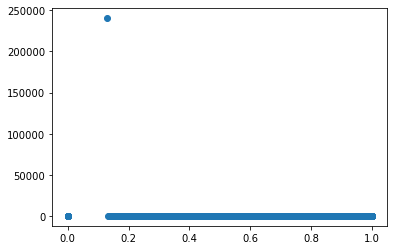

In [10]:
#average of ct
#ct = ct[500:3200]
#pwm_v = pwm_v[500:3200]
#num_ct = np.prod(ct.shape)
plt.plot(pwm_v,ct, 'o')

In [30]:
ct.mean()
torque.mean()*(9.81)/(q*s)

Time (s)
0.000000      inf
0.000000      inf
0.022555      inf
0.047755      inf
0.072535      inf
             ... 
152.556635    inf
152.582630    inf
152.609160    inf
152.632090    inf
152.657425    inf
Name: Motor Electrical Speed (RPM), Length: 5997, dtype: float64

In [23]:
ct = ct

In [24]:
ct = ct[np.abs(ct-ct.mean()) <= (0.9*ct.std())]

In [25]:
q[12:78].mean()

329.02175235333834

In [26]:
s

0.003831975310674826

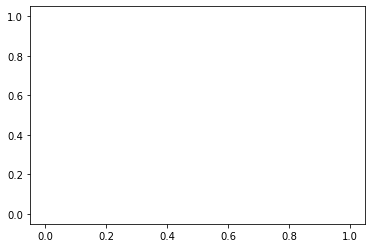

In [27]:
plt.plot(ct,'o')

In [17]:
ct.mean()

nan

In [18]:
ct.max()

nan

In [19]:
ct.min()

nan

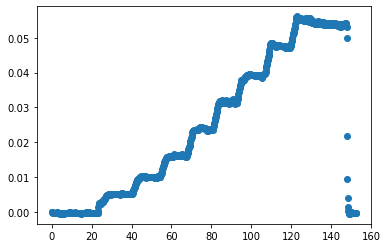

In [20]:
#torque section
plt.plot(torque,'o')

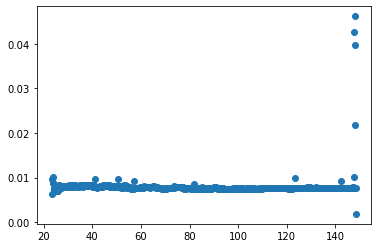

In [21]:
c_torque = torque/(q*s)
plt.plot(c_torque,'o')

In [369]:
c_torque = c_torque[12:78]
c_torque = c_torque[np.abs(c_torque-c_torque.mean()) <= (0.9*c_torque.std())]

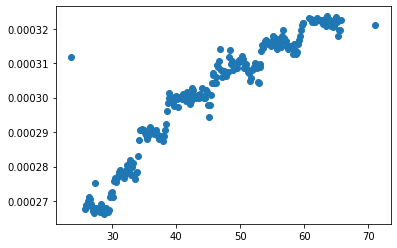

In [370]:
plt.plot(c_torque,'o')

In [371]:
c_torque.mean()

0.00030081539232903776

In [372]:
c_torque.min()

0.00026626914213022824

In [373]:
c_torque.max()

0.00032361114480061645

In [374]:
trust_test = ct.mean()*q*s
trust_test.mean()


1.6005111058071664